In [1]:
import torch.nn.functional as F
import torch
import cv2
import numpy as np
import os
from matplotlib import pyplot as plt

In [2]:
tem_path = 'data/template'
arc_path = 'data/archive2'
out_path = 'data/out'

(191, 205, 3)


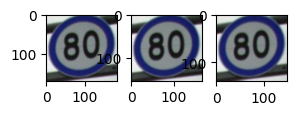

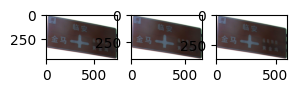

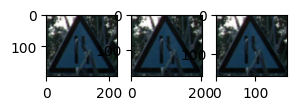

In [198]:
temlist=[]
for tem in os.listdir(tem_path):
    if tem.endswith('.jpg'):
        gray = cv2.imread(os.path.join(tem_path,tem))
        # gray = cv2.cvtColor(gray,cv2.COLOR_RGB2GRAY)
        gray = cv2.GaussianBlur(gray,(7,7),0,0)
        # gray = cv2.equalizeHist(gray)
        # gray = cv2.Canny(gray,100,200)
        temlist.append(gray)

glist = [[temlist[0]],[temlist[1]],[temlist[2]]]
for g in glist:
    plt.figure()
    for i in range(3):
        temp = cv2.resize(g[i],(0,0),fx=0.9,fy=0.9)
        # temp[temp>80]=255
        # temp[temp<80]=0
        g.append(temp)
        plt.subplot(1,6,(i+1))
        plt.imshow(temp)
print(glist[0][0].shape)

In [180]:
def one_match(img, templ):
    h, w = templ.shape[0:2]
    # 匹配模板
    res = cv2.matchTemplate(img, templ, cv2.TM_CCOEFF_NORMED)
    if res.max()>0.1:
        print(res.max())
        min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(res)
        # 计算矩形左边
        top_left = max_loc
        bottom_right = (top_left[0] + w, top_left[1] + h)
        # 画矩形
        cv2.rectangle(img, top_left, bottom_right, (255), 5)
        img = cv2.resize(img,(0,0),fx=0.3,fy=0.3)
        # 展示结果
        cv2.imshow('img_rgb', img)
        cv2.waitKey()

In [199]:
def test():
    for arc in os.listdir(arc_path):
        if arc.endswith('.jpg'):
            gray = cv2.imread(os.path.join(arc_path,arc))
            # gray = cv2.cvtColor(gray,cv2.COLOR_BGR2GRAY)
            gray = cv2.GaussianBlur(gray,(5,5),0,0)
            # gray = cv2.equalizeHist(gray)
            # gray = cv2.Canny(gray,80,120)
            # gray[gray>80]=255
            # gray[gray<80]=0
            # cv2.imwrite("out/test.jpg",gray)
            for g in glist:
                for tem in g:
                    one_match(gray,tem)
test()

0.3940458
0.37763134
0.43307862
0.41454467
0.6621831
0.64898926
0.62139875
0.6670852
0.59260744
0.61541516
0.6359733
0.6683784
